In [735]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.utils as utils
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [736]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [737]:
def get_dataloader(batch_size=64, num_workers=2):
    image_folder = './fgvc_aircraft_dataset/data/'
    image_preprocessing = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.CenterCrop((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    dataset = datasets.ImageFolder(image_folder, image_preprocessing)
    return iter(torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2))

In [738]:
dataloader = get_dataloader()

In [739]:
batch = next(iter(dataloader))

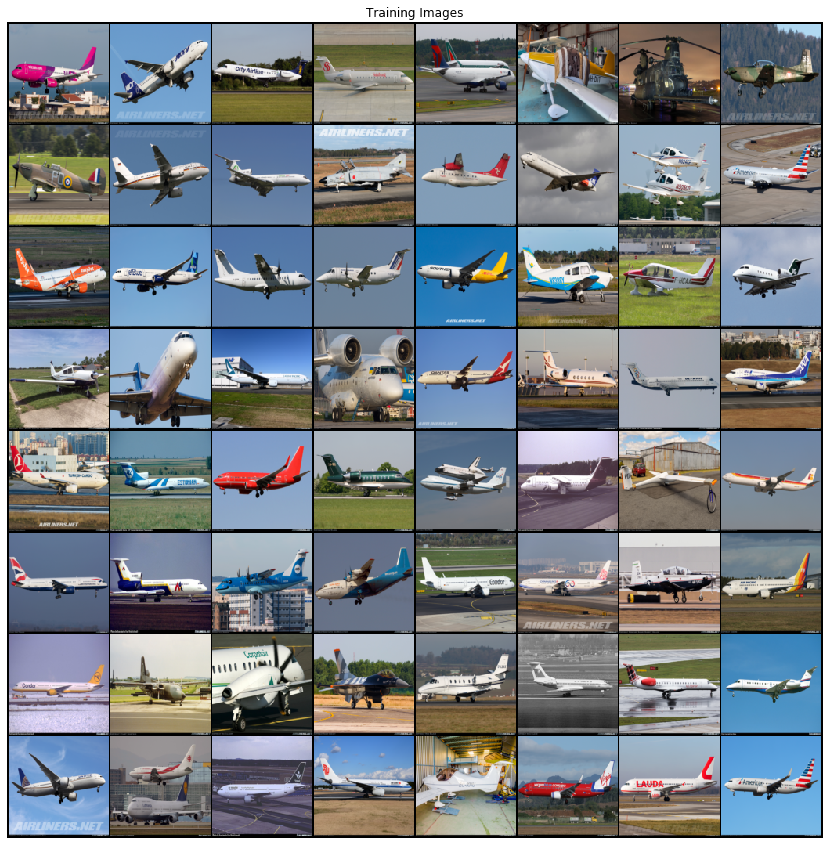

In [740]:
plt.figure(figsize=(15,15))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(utils.make_grid(batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [4]:
from gan_models_copy import Generator, Descriminator
import torch
import torchvision.utils as utils
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [5]:
norm = transforms.Normalize(mean=[-1,-1,-1],std=[2,2,2])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G_net = Generator(lr=0.001, beta=0.5).to(device)
D_net = Descriminator(lr=0.001, beta=0.5).to(device)

G_net.load_state_dict(torch.load('./model_v7_planes_128/models/generator_model_v7_planes_128.pth'))
D_net.load_state_dict(torch.load('./model_v7_planes_128/models/descriminator_model_v7_planes_128.pth'))

<All keys matched successfully>

In [6]:
def plot_random_z():
    z = torch.randn(1, 100, 1, 1).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
    gen_image = G_net(z).detach().cpu()
    plt.figure(figsize=(5,5))
    plt.imshow(norm(gen_image[0]).permute(1,2,0))
    
def vary_each_z():
    z = []
    for var in range(100):
        curr_z = []
        for i in torch.arange(-2, 2, 0.0625):
            x = torch.zeros(100, 1, 1)
            x[var] = i
            curr_z.append(x)
        curr_z = torch.stack(curr_z)
        z.append(curr_z)
    z = torch.stack(z)
    z = z.to(device)
    gen_images = G_net(z).detach().cpu()
    gen_images_grid = utils.make_grid(gen_images, padding=2, normalize=True)
    plt.axis("off")
    plt.title("Fake Images")
    plt.figure(figsize=(15,15))
    fig = plt.imshow(np.transpose(gen_images_grid,(1,2,0)), extent=[-2,2,-2,2])
    plt.show()

def vary_z_two_features(f1=0, f2=1):
    z = []
    for i in torch.arange(-2, 2, 0.5):
        curr_z = []
        for j in torch.arange(-2, 2, 0.5):
            x = torch.zeros(100,1,1)
            x[f1] = i
            x[f2] = j
            curr_z.append(x)
        curr_z = torch.stack(curr_z)
        z.append(curr_z)
    z = torch.cat(tuple(z))
    z = z.to(device)
    gen_images = G_net(z).detach().cpu()
    gen_images_grid = utils.make_grid(gen_images, padding=2, normalize=True)
    plt.axis("off")
    plt.title("Fake Images")
    plt.figure(figsize=(15,15))
    fig = plt.imshow(np.transpose(gen_images_grid,(1,2,0)), extent=[-2,2,-2,2])
    plt.show()

def plot_random_z_batch():
    z = torch.randn(64, 100, 1, 1).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

    G_net.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
    gen_images = G_net(z).detach().cpu()
    gen_images_grid = utils.make_grid(gen_images, padding=2, normalize=True)
    plt.axis("off")
    plt.title("Fake Images")
    plt.figure(figsize=(15,15))
    plt.imshow(np.transpose(gen_images_grid,(1,2,0)))
    plt.show()

In [19]:


G_net.load_state_dict(torch.load('./model_v7_planes_128/models/generator_model_v7_planes_128.pth'))
D_net.load_state_dict(torch.load('./model_v7_planes_128/models/descriminator_model_v7_planes_128.pth'))

<All keys matched successfully>

In [273]:
G_net.load_state_dict(torch.load('./models/generator_model_v4_planes_256.pth'))
D_net.load_state_dict(torch.load('./models/descriminator_model_v4_planes_256.pth'))

<All keys matched successfully>

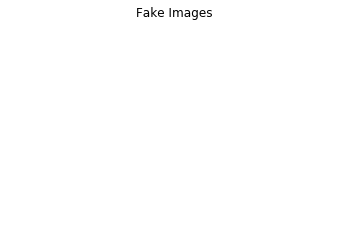

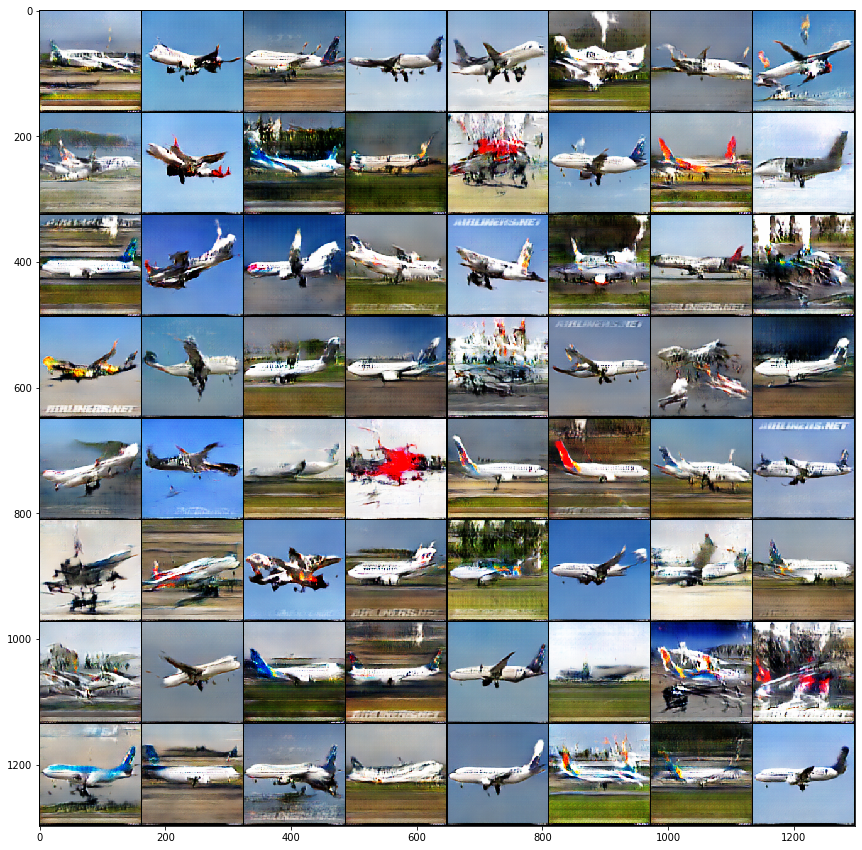

In [20]:
plot_random_z_batch()

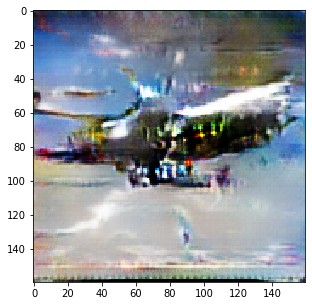

In [29]:
plot_random_z()

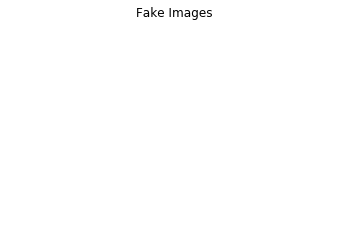

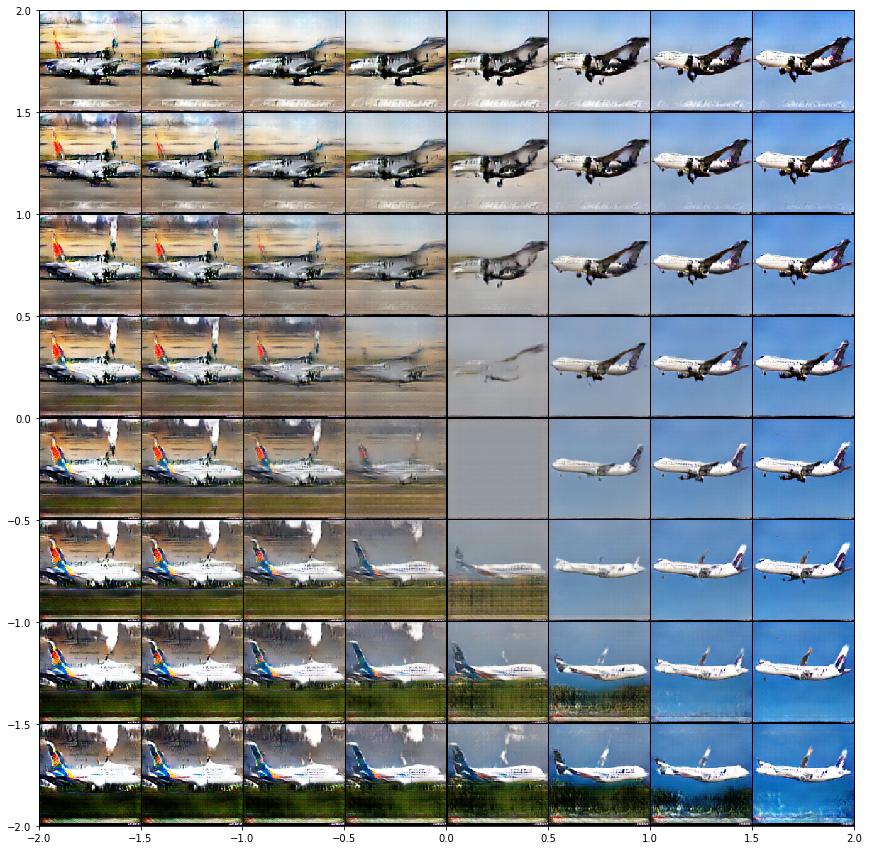

In [30]:
vary_z_two_features(10,75)

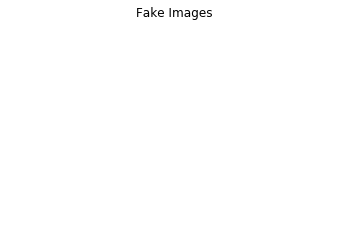

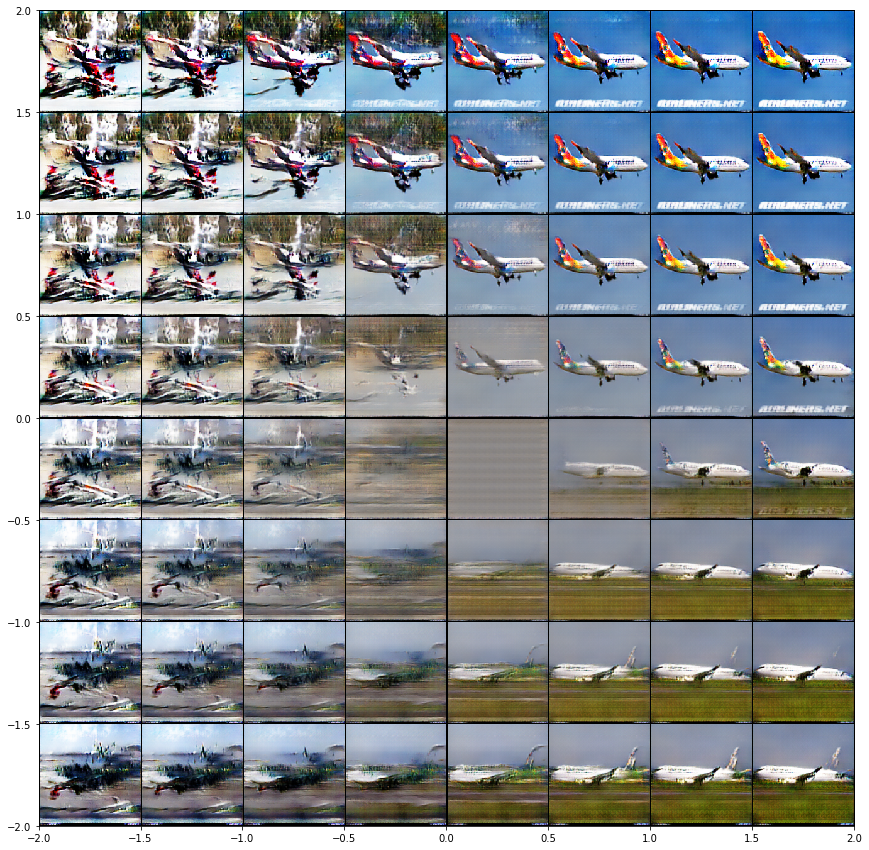

In [31]:
vary_z_two_features(20,60)